In [19]:
import graph_flow
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import networkx as nx
import ipywidgets
import itertools
import tntp
from typing import List

In [20]:
def show_flow(g: graph_flow.Graph, edges: List[tuple], flow: List[tuple], figsize=(7, 7)):
    H1 = g.G.copy()
    g.set_flow(flow)
    found, free, _ = g.calculate_flow()
    if found:
        plt.figure(figsize=figsize)
        pos = nx.kamada_kawai_layout(g.G)
        nx.draw_networkx(H1, pos, edge_color="lightblue", node_color="orange")
        nx.draw_networkx_edges(H1, pos, edgelist=[(edge[0], edge[1]) for (i, edge) in enumerate(edges) if free[i][0] == True], 
                            edge_color="xkcd:orange red")
        
        nx.draw_networkx_edges(H1, pos, edgelist=[(edge[0], edge[1]) for (i, edge) in enumerate(edges) if free[i][1] == True], 
                            edge_color="xkcd:purple blue")
        red_patch = mpatches.Patch(color='xkcd:orange red', label='Unfilled edges')
        blue_patch = mpatches.Patch(color='xkcd:purple blue', label='Empty edges')
        violet_patch = mpatches.Patch(color='lightblue', label='Congested edges')
        plt.title("Unfilled edges")
        plt.legend(handles= [red_patch, blue_patch, violet_patch])
        plt.show()
    else:
        print("no solution")

In [21]:
# Shows flow for correspondence group fom one vertex, not single correspondence
def show_corr_flow(g: graph_flow.Graph, edges: List[tuple], flow: List[tuple], corr_group_id = 0, figsize=(7, 7)):
    H1 = g.G.copy()
    g.set_flow(flow)
    found, _, corr_edges = g.calculate_flow()
    if found:
        plt.figure(figsize=figsize)
        pos = nx.kamada_kawai_layout(g.G)
        nx.draw_networkx(H1, pos, edge_color="lightblue", node_color="orange")
        nx.draw_networkx_edges(H1, pos, 
                                edgelist=[(edges[i][0], edges[i][1]) for i in corr_edges[corr_group_id]], 
                                edge_color="xkcd:orange red")
        
        red_patch = mpatches.Patch(color='xkcd:orange red', label='Edges from correspondence group')
        plt.title("Correspondence edges")
        plt.legend(handles= [red_patch])
        plt.show()
    else:
        print("no solution")

In [22]:
def show_paths(g: graph_flow.Graph, edges: List[tuple], flow: List[tuple],
               paths: List[int] = None, figsize=(7, 7)):
    H1 = g.G.copy()
    g.set_flow(flow)
    found, free, _ = g.calculate_flow()
    if found:
        calc, _, _,_, _ = g.calculate_time()
        if calc:
            plt.figure(figsize=figsize)
            if paths is None:
                paths = range(len(flow))
            p_edges = set(itertools.chain.from_iterable(
                g.get_path(t) for t in paths
            ))
            pos = nx.kamada_kawai_layout(g.G)
            nx.draw_networkx(H1, pos, edge_color="lightblue", node_color="orange")
            nx.draw_networkx_edges(H1, pos, edgelist=[(edges[i][0], edges[i][1]) for i in p_edges], 
                                edge_color="xkcd:orange red")
            
            red_patch = mpatches.Patch(color='xkcd:orange red', label='Edges that determine flow cost')
            plt.title("Edges that determine flow cost")
            plt.legend(handles= [red_patch])
            plt.show()
        else:
            print("cannot calculate time")
    else:
        print("no solution")

In [23]:
def show_braess(g: graph_flow.Graph, edges: List[tuple], flow: List[tuple],
                figsize=(7, 7)):
    H1 = g.G.copy()
    g.set_flow(flow)
    found, free, _ = g.calculate_flow()
    if found:
        calc, br_edges, _,_, _ = g.calculate_time()
        if calc:
            plt.figure(figsize=figsize)
            pos = nx.kamada_kawai_layout(g.G)
            nx.draw_networkx(H1, pos, edge_color="lightblue", node_color="orange")
            nx.draw_networkx_edges(H1, pos, edgelist=[(edges[i][0], edges[i][1]) for (i, _) in br_edges], 
                                edge_color="xkcd:orange red")
            
            red_patch = mpatches.Patch(color='xkcd:orange red', label='Braess edges')
            plt.title("Braess eddges")
            plt.legend(handles= [red_patch])
            plt.show()
        else:
            print("cannot calculate time")
    else:
        print("no solution")

### Примеры


#### 1. Простое браесовское ребро


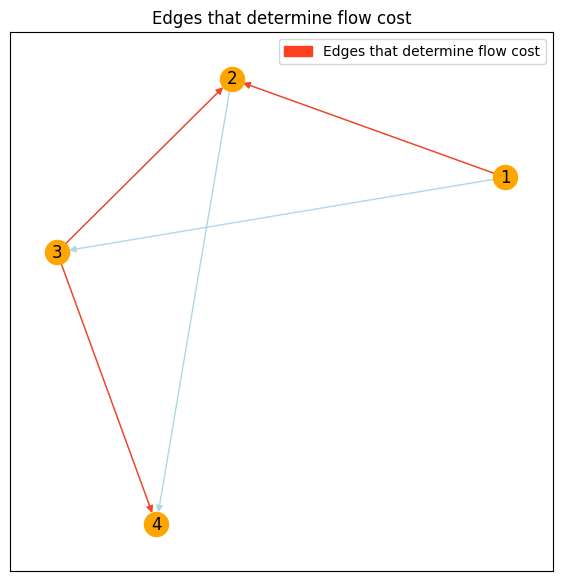

In [27]:
show_paths(g, edges, flow=[
    (1, 4, 150)
])

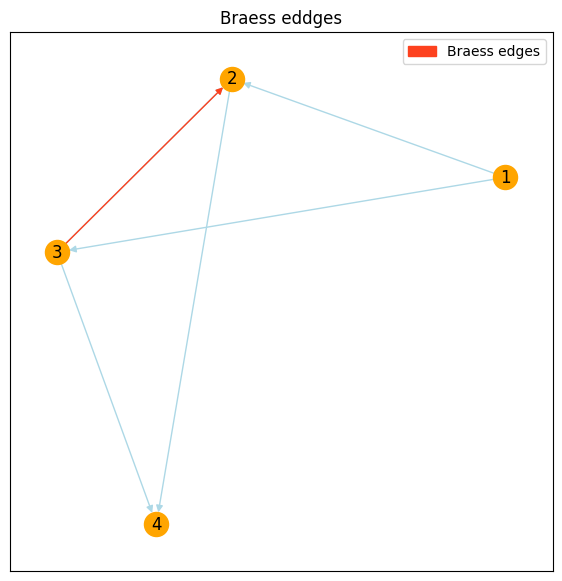

In [28]:
show_braess(g, edges, flow=[
    (1, 4, 150)
])

Проверим, что при увеличении стоиости для браессовского ребра общее время уменьшается.


In [29]:
def get_sum(g):
    g.reset_flow()
    found, _, _ = g.calculate_flow()
        
    if found:
        calc, br, _,_, sum = g.calculate_time()
        if calc:
            return (sum, br)
    return (None, None)

f = [(1, 4, 150)]
g.set_flow(f)
sum, br = get_sum(g)
print("Before: ",sum)
g.add_cost(br[0][0], 1000)
sum, _ = get_sum(g)
print("After: ", sum)
g.reset_cost(br[0][0])

Before:  2850.0
After:  1950.0


#### 2. Примерс с 2 корреспонденциями


In [30]:
N = 5
edges = [
    (1, 2, 6, 5000),
    (2, 3, 100, 1000),
    (2, 4, 100, 4000),
    (2, 5, 100, 6000),
    (3, 4, 5, 2000),
    (4, 5, 100, 15000),
    (4, 1, 100, 3000)
]
flow = [(1, 4, 3.11), (3, 5, 4.5)]
g = graph_flow.Graph(N, edges)

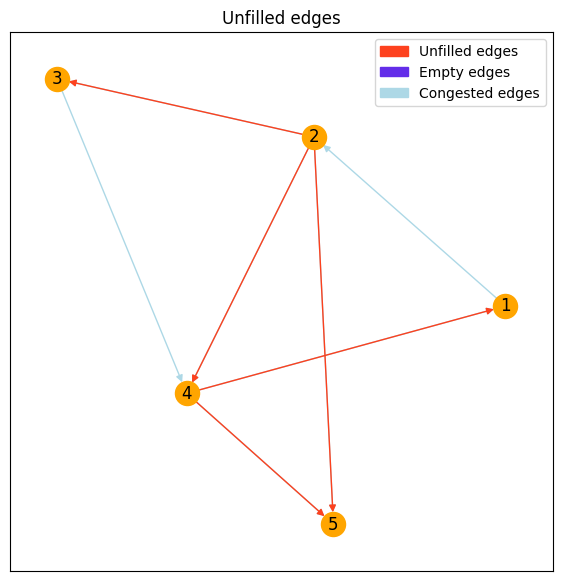

In [31]:
show_flow(g, edges, flow=flow)

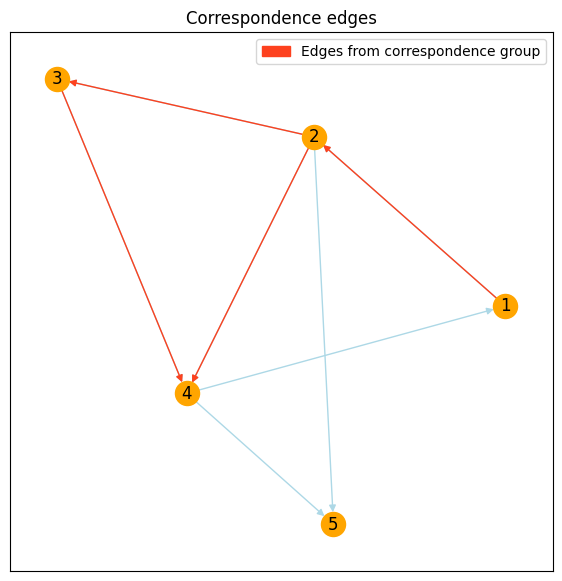

In [32]:
show_corr_flow(g, edges, flow)

Поток из 1 в 5 идёт только через ребро 1-2, которе забито. Рассмотрим путь, по которому расчитывается стоимость.


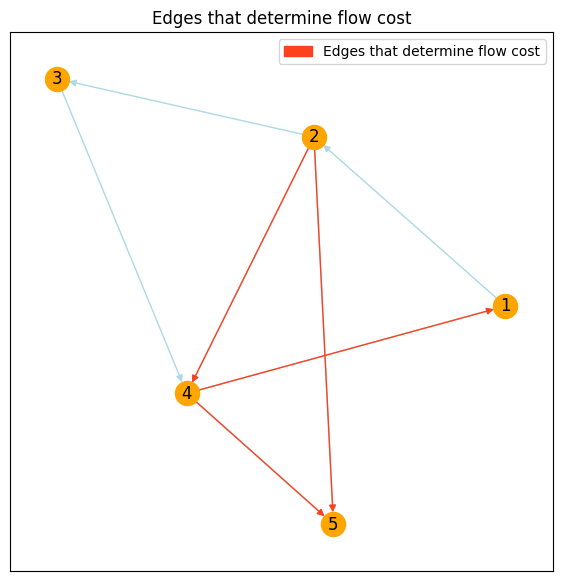

In [33]:
show_paths(g, edges, flow=flow, paths=[0])

#### 3. Anaheim


In [34]:

N, edges = tntp.read_network("./TransportationNetworks/Anaheim/Anaheim_net.tntp")
flow = tntp.read_trips("./TransportationNetworks/Anaheim/Anaheim_trips.tntp")
flow = [(u, v, f*0.51) for (u, v, f) in flow if f > 0]
g = graph_flow.Graph(N, edges)

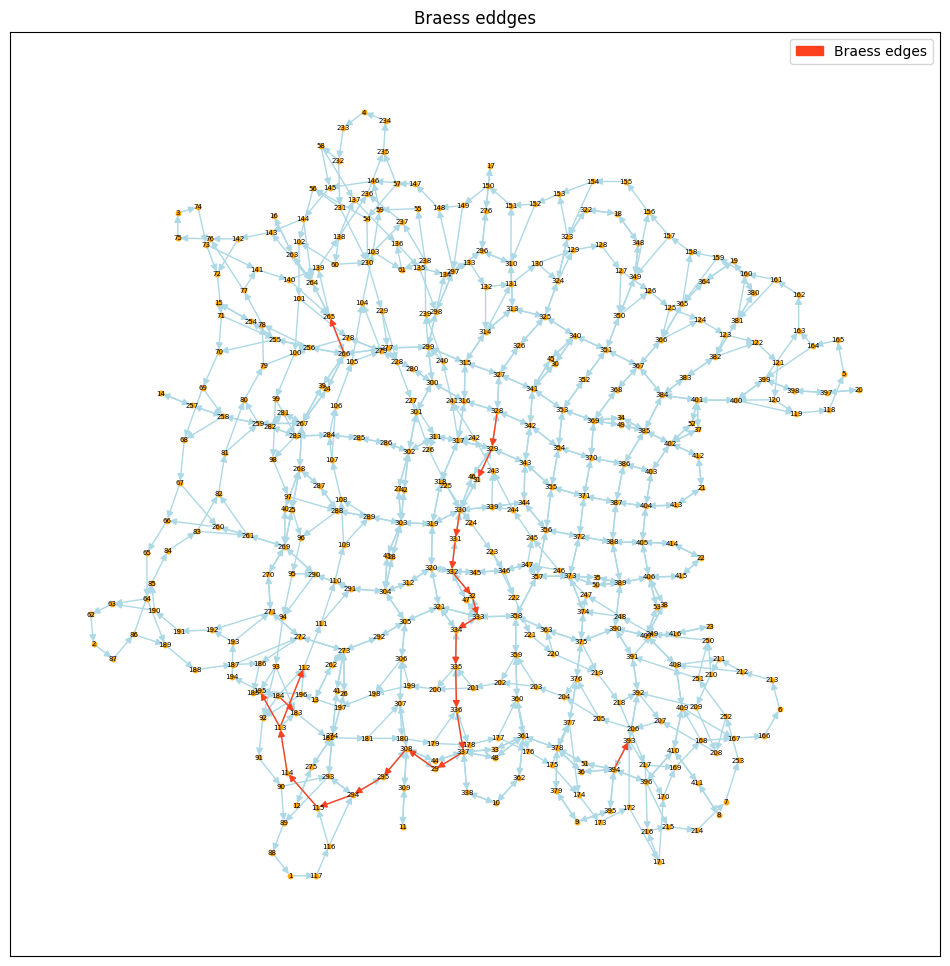

In [35]:
H1 = g.G.copy()
g.set_flow(flow)
found, free, _ = g.calculate_flow()
if found:
    calc, br_edges, _, _,_ = g.calculate_time()
    if calc:
        plt.figure(figsize=(12, 12))
        pos = nx.kamada_kawai_layout(g.G)
        nx.draw_networkx(H1, pos, edge_color="lightblue", node_color="orange",
                         node_size=10, font_size=5)
        nx.draw_networkx_edges(H1, pos, edgelist=[(edges[i][0], edges[i][1]) for (i, _) in br_edges], 
                            edge_color="xkcd:orange red", node_size=10)
        
        red_patch = mpatches.Patch(color='xkcd:orange red', label='Braess edges')
        plt.title("Braess eddges")
        plt.legend(handles= [red_patch])
        plt.show()
    else:
        print("cannot calculate time")
else:
    print("no solution")

Попробуем уменьшить суммарную стоимость по Браессовским рёбрам


In [36]:
def calculate_cost():
    g.set_flow(flow)
    found, _, _ = g.calculate_flow()
    if found:
        calc, br_edges, _, _, sum = g.calculate_time()
        if calc:
            return sum, br_edges
    return None, None

sum, br_edges = calculate_cost()
print("Before: ", sum)
print("Braess edges: ", [br[0] for br in br_edges])
g.add_cost(175, 0.22)
g.add_cost(492, 0.06)
g.add_cost(871, 0.01)
g.add_cost(641, 0.3)
g.add_cost(278, 1.)
g.add_cost(845, 0.23)
sum, br_edges = calculate_cost()
print("After: ", sum)



Before:  603337.9465497163
Braess edges:  [39, 46, 175, 177, 178, 179, 278, 412, 492, 495, 545, 611, 613, 622, 625, 626, 634, 638, 641, 644, 645, 845]
After:  601824.8921047185
